# Deep Learning and Neural Network - Question 3
## Arian Firoozi - 810100196
## Arman Majidi - 810100205

![University of Tehran logo](UTLogo\University_of_Tehran_logo.svg "University of Tehran")
![Engineering faculty of University of Tehran logo](UTLogo\Engineering_faculty_University_of_Tehran_logo.png "Engineering faculty")

# Outline
- [ 0 - Packages ](#0)
- [ 1 - MLP Design ](#1)
- [ 2 - Two Different Model Training ](#2)
- [ 3 - Backpropagation Algorithm ](#3)
- [ 4 - Different Hyperparameters Checking ](#4)

<a name="0"></a>
## 0 - Packages 

First, let's run the cell below to import all the packages.
- [numpy](https://numpy.org) is the fundamental package for working with matrices in Python.
- [pandas](https://pandas.pydata.org) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [seanborn](https://seaborn.pydata.org) is a Python data visualization library based on matplotlib.
- [tensorflow](https://tensorflow.org) is an end-to-end platform for machine learning.
- [scikit-learn](https://scikit-learn.org) is a Python module for machine learning.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix

---

<a name="1"></a>
## 1 - MRI and MRII Algorithms

#### ◆ MRI algorithm

Madaline I is the original version of the algorithm, mainly designed for binary classification. Here are the essential steps and concepts behind it:

* **Architecture:**
MRI consists of a multi-layer neural network where each node in the first layer (input layer) is connected to the Adaline units in the second layer  (hidden layer).These Adaline units are connected to an output layer.
Each Adaline unit (adaptive linear neuron) is a linear threshold element that adjusts its weights according to the input data.

* **Training Process:**
 The MRI algorithm uses batch processing and the Least Mean Squares (LMS) rule for weight adjustment.
The weights are updated based on minimizing the error, calculated as the difference between the desired and actual outputs over the whole batch.

* **Threshold Logic:**
 Each Adaline unit decides whether to output +1 or -1 based on the weighted sum of its inputs.
An output of +1 indicates a class A prediction, and -1 indicates a class B prediction.

* **Limitations:**
 MRI only applies to networks with single-layer Adaline units, so it cannot model highly non-linear functions.
Due to the lack of error backpropagation, it is not well-suited for multi-layer structures, limiting its complexity.

#### ◆ MRII algorithm

Madaline II (MRII) is an improvement over the original MRI model, aiming to address its limitations by providing a more sophisticated training mechanism called the Madaline Rule II (MRII) or MRII learning algorithm.

* **Architecture:**
MRII maintains a similar structure to MRI but typically employs multiple layers.
It allows for hidden layers with multiple adaptive neurons, enabling the model to capture more complex decision boundaries.

* **Training Process (Madaline Rule II):**
MRII’s training process involves a heuristic approach to modify weights called the Madaline Rule II (MRII).
This rule uses a concept called the “minimal disturbance principle,” which means the weights are adjusted as minimally as possible to correct a wrong classification.
The MRII rule applies changes only to neurons that have made errors in prediction, making the algorithm more efficient.

* **Modified Delta Rule:**
MRII uses a modified version of the delta rule to update the weights based on the output error.
This rule considers the sign and magnitude of errors in calculating weight adjustments, further optimizing the learning process.

* **Multiple Adaptation Techniques:**
MRII introduces multiple techniques for training, including relaxation methods and retraining based on past performance, which helps avoid local minima and improves accuracy.

* **Performance Improvements:**
MRII is more robust than MRI as it can handle multiple layers and complex decision boundaries.
It is better suited for applications where a high level of precision is required, as the minimal disturbance principle helps avoid overfitting and provides a smoother decision surface.

---

<a name="2"></a>
## 2 - Scatter Plot of Data

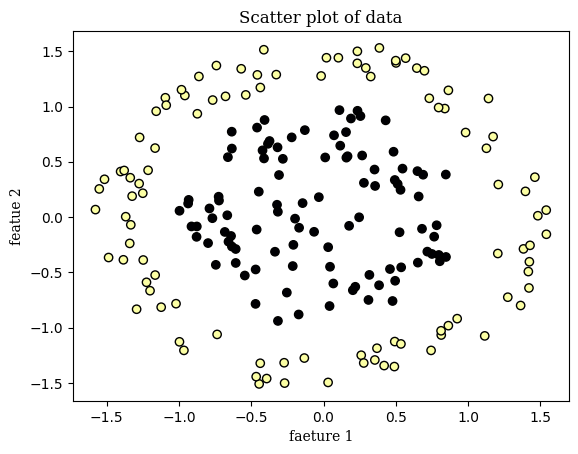

In [110]:
data = np.array(pd.read_csv('data\\Question3.csv', header=None))
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='inferno', edgecolor='k')
plt.title('Scatter plot of data', fontdict={'family':'serif'})
plt.xlabel('faeture 1', fontdict={'family':'serif'})
plt.ylabel('featue 2', fontdict={'family':'serif'})
plt.show()

---

<a name="3"></a>
## 3 - Model Training

In [124]:
class MRI:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=1, epoches=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epoches = epoches
        self.weights_input_hidden = np.random.randn(hidden_size, input_size) * 0.01
        self.bias_input_hidden = np.random.randn(hidden_size, 1) * 0.01
        self.weights_hidden_output = np.ones([output_size, hidden_size]) / hidden_size
        self.bias_hidden_output = np.ones([output_size, 1]) / hidden_size
        
    def activate(self, x):
        return np.where(x >= 0, 1, -1)

    def predict(self, X):
        hidden_input = X @ self.weights_input_hidden.T + self.bias_input_hidden.T
        hidden_output = self.activate(hidden_input)
        output_input = hidden_output @ self.weights_hidden_output.T + self.bias_hidden_output.T
        final_output = self.activate(output_input)
        return final_output
        
    def fit(self, X, y):
        for epoch in range(self.epoches):
            y = y.reshape(-1, 1)
            for i in range(len(X)):
                x_i = X[i].reshape(1, -1)
                y_i = y[i]
                net = self.weights_input_hidden @ x_i.T + self.bias_input_hidden
                if self.predict(x_i) != y_i and y_i == -1:
                    # Update hidden to output weights                
                    self.weights_input_hidden += self.learning_rate * (y_i - net) * x_i
                    self.bias_input_hidden += self.learning_rate * (y_i - net)
                elif self.predict(x_i) != y_i and y_i == 1:
                    ind = np.argmin(np.abs(net))
                    self.weights_input_hidden[ind] += (self.learning_rate * (y_i - net[ind]) * x_i).flatten()
                    self.bias_input_hidden[ind] += self.learning_rate * (y_i - net[ind])
            if (epoch % 10 == 0):
                print(f'Epoch: {epoch} -> Error: {np.sum(np.abs(self.predict(X) - y))}')

In [125]:
X = data[:, :-1]
y = data[:, -1]

# Initialize MRII model
model = MRI(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1, epoches=1000)
    
    # Train the model
model.fit(X, y)
    
# Predictions
predictions = model.predict(X)
print("Predictions:\n", predictions)
# print("Final Weights (Input to Hidden):\n", model.weights_input_hidden)
# print("Final Weights (Hidden to Output):\n", model.weights_hidden_output)

Epoch: 0 -> Error: 100.0
Epoch: 10 -> Error: 100.0
Epoch: 20 -> Error: 100.0
Epoch: 30 -> Error: 100.0
Epoch: 40 -> Error: 100.0
Epoch: 50 -> Error: 100.0
Epoch: 60 -> Error: 100.0
Epoch: 70 -> Error: 100.0
Epoch: 80 -> Error: 100.0
Epoch: 90 -> Error: 100.0
Epoch: 100 -> Error: 100.0
Epoch: 110 -> Error: 100.0
Epoch: 120 -> Error: 100.0
Epoch: 130 -> Error: 100.0
Epoch: 140 -> Error: 100.0
Epoch: 150 -> Error: 100.0
Epoch: 160 -> Error: 100.0
Epoch: 170 -> Error: 100.0
Epoch: 180 -> Error: 100.0
Epoch: 190 -> Error: 100.0
Epoch: 200 -> Error: 100.0
Epoch: 210 -> Error: 100.0
Epoch: 220 -> Error: 100.0
Epoch: 230 -> Error: 100.0
Epoch: 240 -> Error: 100.0
Epoch: 250 -> Error: 100.0
Epoch: 260 -> Error: 100.0
Epoch: 270 -> Error: 100.0
Epoch: 280 -> Error: 100.0
Epoch: 290 -> Error: 100.0
Epoch: 300 -> Error: 100.0
Epoch: 310 -> Error: 100.0
Epoch: 320 -> Error: 100.0
Epoch: 330 -> Error: 100.0
Epoch: 340 -> Error: 100.0
Epoch: 350 -> Error: 100.0
Epoch: 360 -> Error: 100.0
Epoch: 370 -

---

In [126]:
import numpy as np
class MRI:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epoches=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epoches = epoches
        self.weights_input_hidden = np.array([[0.05, 0.2],
                                              [0.1, 0.2]])
        self.bias_input_hidden = np.array([[0.3],
                                           [0.15]])
        self.weights_hidden_output = np.ones([output_size, hidden_size]) / hidden_size
        self.bias_hidden_output = np.ones([output_size, 1]) / hidden_size
        
    def activate(self, x):
        return np.where(x >= 0, 1, -1)

    def predict(self, X):
        hidden_input = X @ self.weights_input_hidden.T + self.bias_input_hidden.T
        hidden_output = self.activate(hidden_input)
        output_input = hidden_output @ self.weights_hidden_output.T + self.bias_hidden_output.T
        final_output = self.activate(output_input)
        return final_output

    def fit(self, X, y):
        for epoch in range(self.epoches):
            y = y.reshape(-1, 1)
            for i in range(len(X)):
                x_i = X[i].reshape(1, -1)
                y_i = y[i]
                net = self.weights_input_hidden @ x_i.T + self.bias_input_hidden
                if self.predict(x_i) != y_i and y_i == -1:
                    # Update hidden to output weights                
                    self.weights_input_hidden += self.learning_rate * (y_i - net) * x_i
                    self.bias_input_hidden += self.learning_rate * (y_i - net)
                elif self.predict(x_i) != y_i and y_i == 1:
                    ind = np.argmin(np.abs(net))
                    self.weights_input_hidden[ind] += (self.learning_rate * (y_i - net[ind]) * x_i).flatten()
                    self.bias_input_hidden[ind] += self.learning_rate * (y_i - net[ind])
            print(f'W:\n{self.weights_input_hidden}\nb:\n{self.bias_input_hidden}\n\n')

In [127]:
X = np.array([[1, 1],
              [1, -1],
              [-1, 1],
              [-1, -1]])
y = np.array([[-1],
              [1],
              [1],
              [-1]])

# Initialize MRI model
model = MRI(input_size=2, hidden_size=2, output_size=1, learning_rate=0.5, epoches=4)
    
    # Train the model
model.fit(X, y)
    
# Predictions
predictions = model.predict(X)
print("Predictions:\n", predictions)
print("Final Weights (Input to Hidden):\n", model.weights_input_hidden)
print("Final Weights (Hidden to Output):\n", model.weights_hidden_output)

W:
[[ 1.40625 -0.06875]
 [-0.20625  1.36875]]
b:
[[-0.98125]
 [-0.99375]]


W:
[[ 1.3203125 -1.3390625]
 [-1.2921875  1.2859375]]
b:
[[-1.0671875]
 [-1.0765625]]


W:
[[ 1.3203125 -1.3390625]
 [-1.2921875  1.2859375]]
b:
[[-1.0671875]
 [-1.0765625]]


W:
[[ 1.3203125 -1.3390625]
 [-1.2921875  1.2859375]]
b:
[[-1.0671875]
 [-1.0765625]]


Predictions:
 [[-1]
 [ 1]
 [ 1]
 [-1]]
Final Weights (Input to Hidden):
 [[ 1.3203125 -1.3390625]
 [-1.2921875  1.2859375]]
Final Weights (Hidden to Output):
 [[0.5 0.5]]


In [11]:
class MRI:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epoches=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epoches = epoches
        self.weights_input_hidden = np.random.randn(hidden_size, input_size) * 0.01
        self.bias_input_hidden = np.random.randn(hidden_size, 1) * 0.01
        self.weights_hidden_output = np.ones([output_size, hidden_size]) / hidden_size
        self.bias_hidden_output = np.ones([output_size, 1]) / hidden_size
        
    def activate(self, x):
        return np.where(x >= 0, 1, -1)

    def predict(self, X):
        hidden_input = X @ self.weights_input_hidden.T + self.bias_input_hidden.T
        hidden_output = self.activate(hidden_input)
        output_input = hidden_output @ self.weights_hidden_output.T + self.bias_hidden_output.T
        final_output = self.activate(output_input)
        return final_output

    def nets(self, X):
        net = self.weights_input_hidden @ X.T + self.bias_input_hidden
        return net

    def fit(self, X, y):
        for epoch in range(self.epoches):
            y = y.reshape(-1, 1)
            for ind in range(len(X)):
                x_i = X[ind].reshape(1, -1)
                y_i = y[ind]
                net = self.nets(x_i)
                # Update hidden to output weights                
                self.weights_input_hidden += self.learning_rate * (y_i - net) * x_i
                self.bias_input_hidden += self.learning_rate * (y_i - net)